In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [30]:
# load the data
df_energy = pd.read_csv('data/df_energy_processed.csv')
df_weather = pd.read_csv('data/df_weather_processed.csv')
df = pd.read_csv('data/df.csv')

In [31]:
pd.set_option('display.max_columns', None) 
print(df.head)

<bound method NDFrame.head of                              time  generation biomass  \
0       2015-01-01 00:00:00+00:00               449.0   
1       2015-01-01 00:00:00+00:00               449.0   
2       2015-01-01 00:00:00+00:00               449.0   
3       2015-01-01 00:00:00+00:00               449.0   
4       2015-01-01 00:00:00+00:00               449.0   
...                           ...                 ...   
175080  2018-12-31 22:00:00+00:00               290.0   
175081  2018-12-31 22:00:00+00:00               290.0   
175082  2018-12-31 22:00:00+00:00               290.0   
175083  2018-12-31 22:00:00+00:00               290.0   
175084  2018-12-31 22:00:00+00:00               290.0   

        generation fossil brown coal/lignite  generation fossil gas  \
0                                      328.0                 5196.0   
1                                      328.0                 5196.0   
2                                      328.0                 5196.0   
3

In [32]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description'],
      dtype='object')

# Plots

## generation biomass

In [33]:
# Convert the column from string to datetime
df['time'] = pd.to_datetime(df['time'], utc=True) # datetime values that are explicitly in UTC

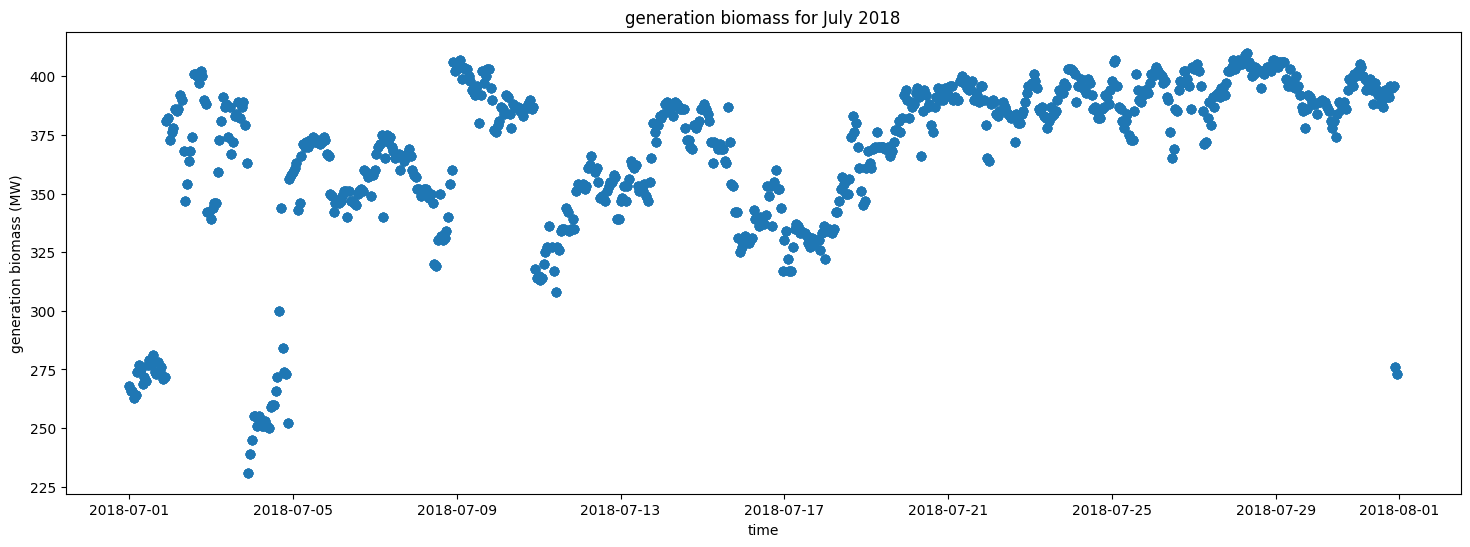

In [34]:
filtered_df = df[(df['time'].dt.year == 2018) & (df['time'].dt.month == 7)]

# scatter plot
plt.figure(figsize=(18,6))
plt.scatter(filtered_df['time'], filtered_df['generation biomass'])
plt.title('generation biomass for July 2018')
plt.xlabel('time')
plt.ylabel('generation biomass (MW)')
plt.show()

- We can see an overall increase in values for generation biomass over time.

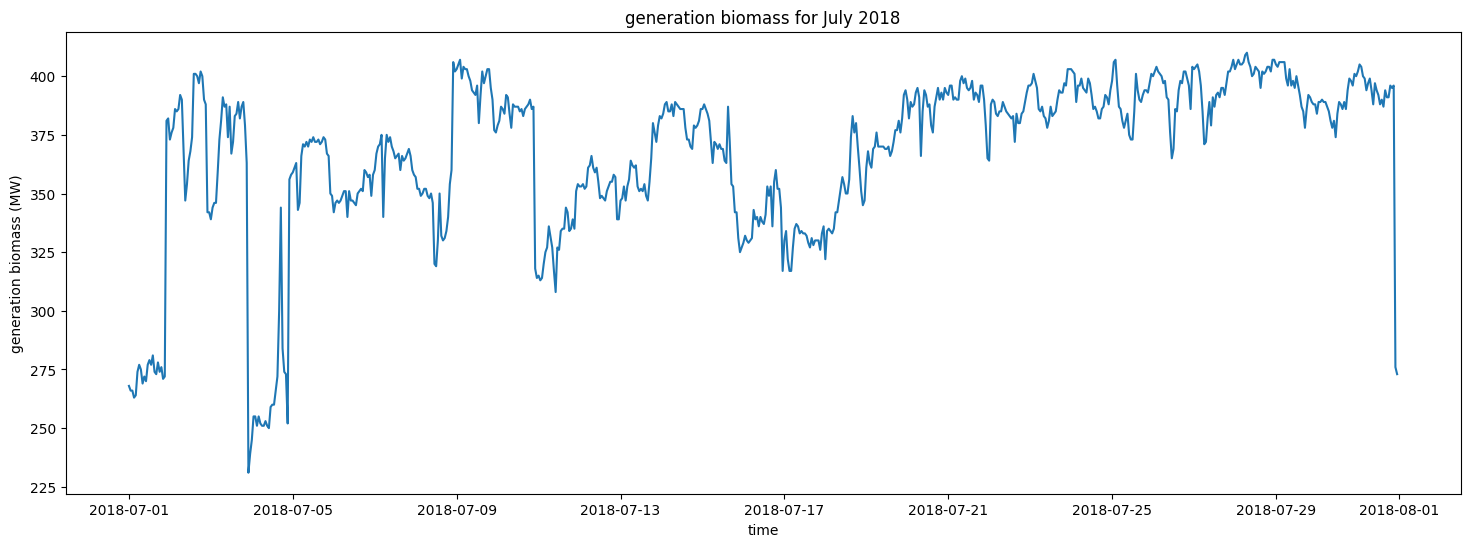

In [35]:
# line plot
plt.figure(figsize=(18,6))
plt.plot(filtered_df['time'], filtered_df['generation biomass'])
plt.xlabel('time')
plt.ylabel('generation biomass (MW)')
plt.title('generation biomass for July 2018')
plt.show()

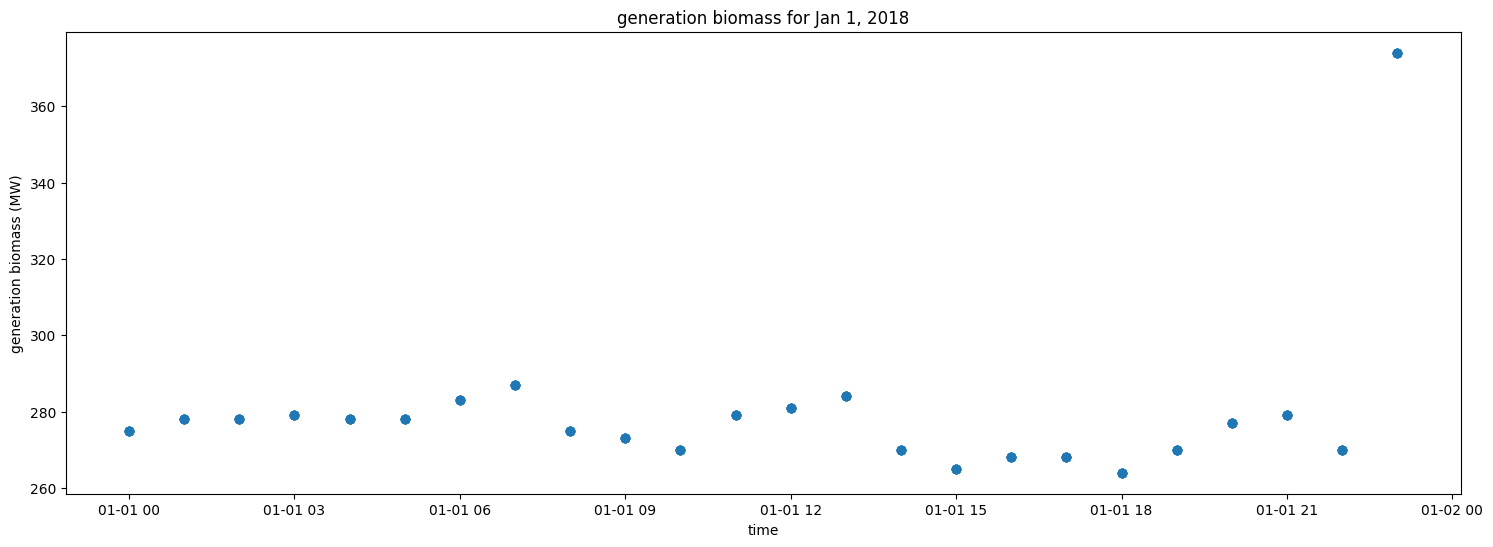

In [36]:
specific_date = pd.to_datetime('2018-01-01')
filtered_df = df[df['time'].dt.date == specific_date.date()]

# scatter plot
plt.figure(figsize=(18,6))
plt.scatter(filtered_df['time'], filtered_df['generation biomass'])
plt.title('generation biomass for Jan 1, 2018')
plt.xlabel('time')
plt.ylabel('generation biomass (MW)')
plt.show()

- for this particular day, we can see that generation biomass is not same for each hour.

## price actual

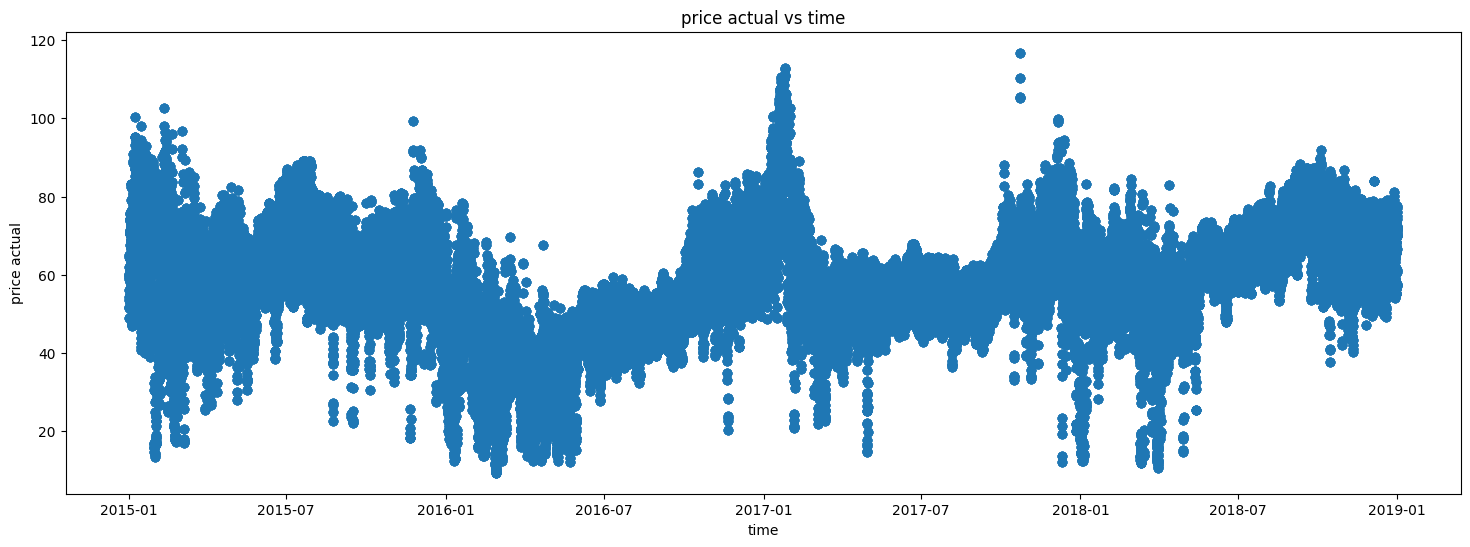

In [37]:
# target: price actual

# scatter plot
# price actual vs time

plt.figure(figsize=(18,6))
plt.scatter(df['time'], df['price actual'])
plt.title('price actual vs time')
plt.xlabel('time')
plt.ylabel('price actual')
plt.show()

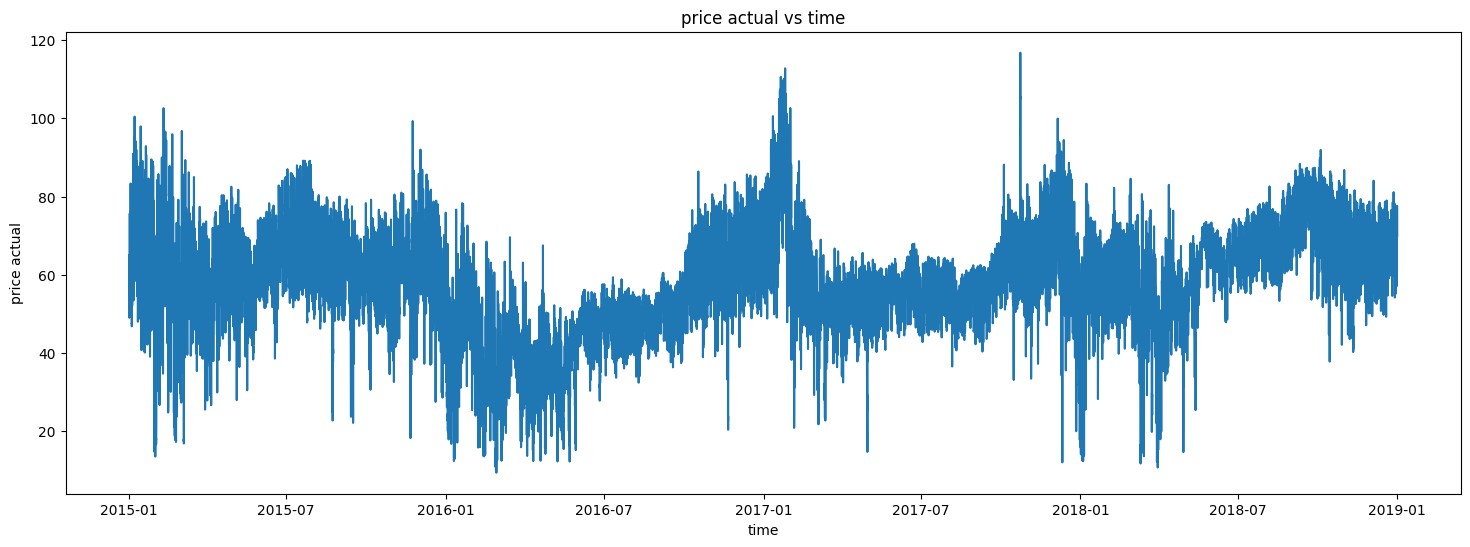

In [38]:
# line plot
# price actual vs time

plt.figure(figsize=(18,6))
plt.plot(df['time'], df['price actual'])
plt.title('price actual vs time')
plt.xlabel('time')
plt.ylabel('price actual')
plt.show()

- We can see an increase, then decrease, then increase in price actual over time.

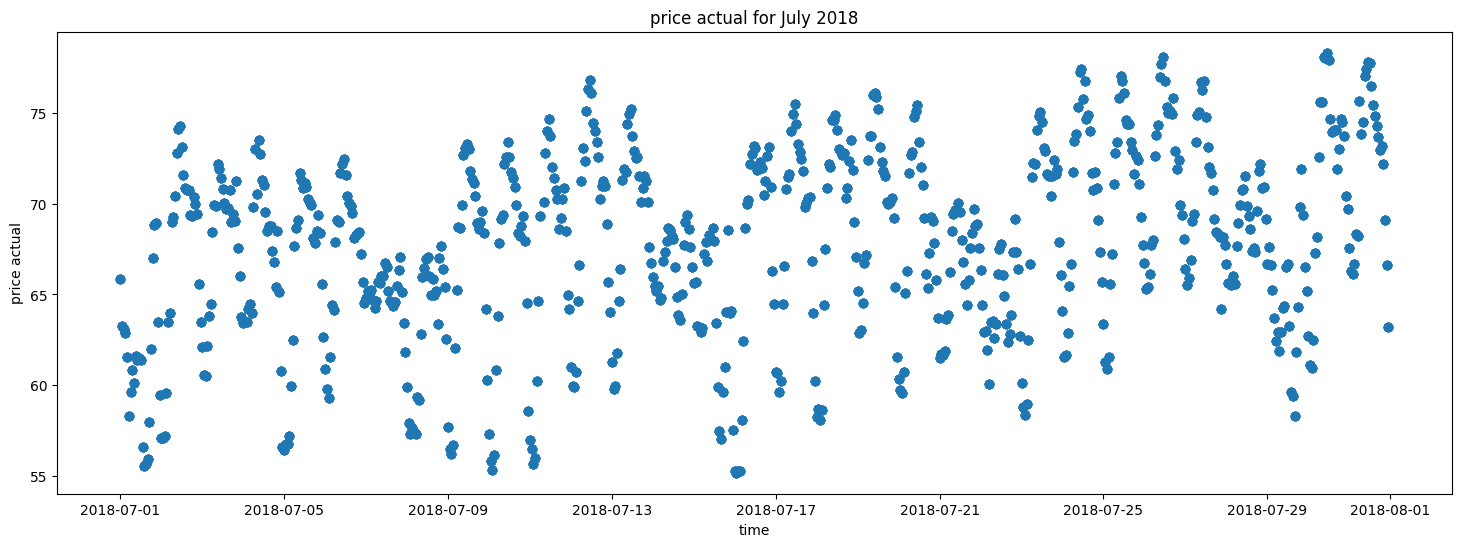

In [39]:
# scatter plot
# price actual for July 2018

filtered_df = df[(df['time'].dt.year == 2018) & (df['time'].dt.month == 7)]

plt.figure(figsize=(18,6))
plt.scatter(filtered_df['time'], filtered_df['price actual'])
plt.title('price actual for July 2018')
plt.xlabel('time')
plt.ylabel('price actual')
plt.show()

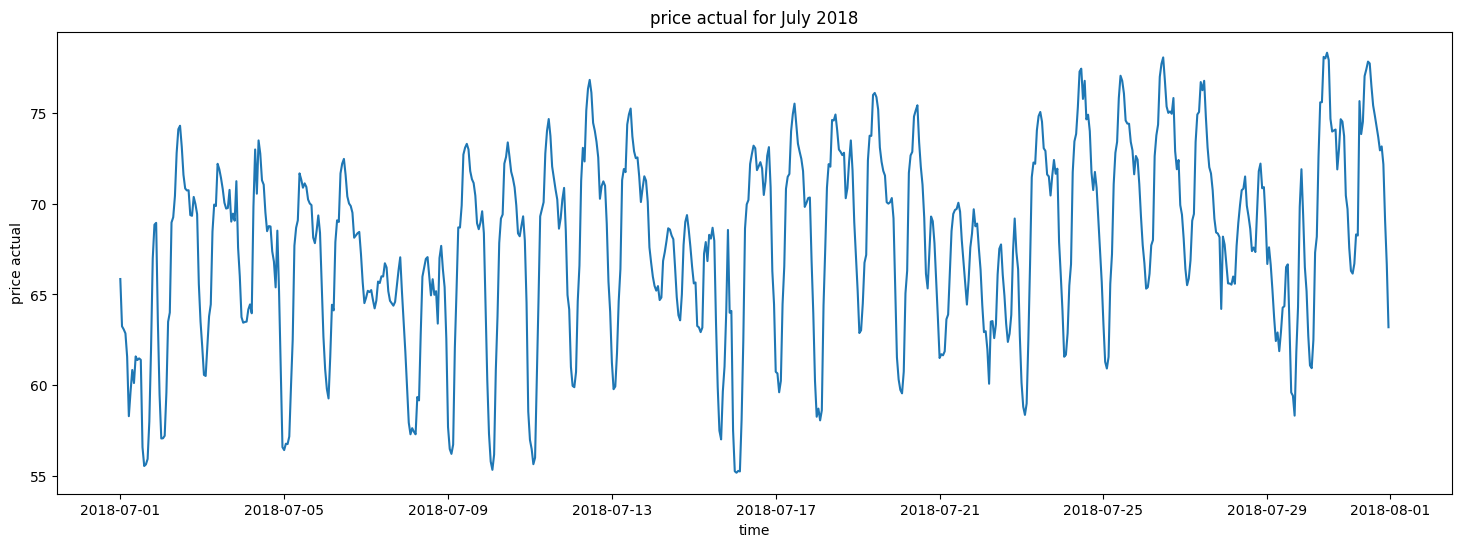

In [40]:
# line plot
# price actual for July 2018

plt.figure(figsize=(18,6))
plt.plot(filtered_df['time'], filtered_df['price actual'])
plt.title('price actual for July 2018')
plt.xlabel('time')
plt.ylabel('price actual')
plt.show()

- We can see a lot of variation in price actual over days in a month.

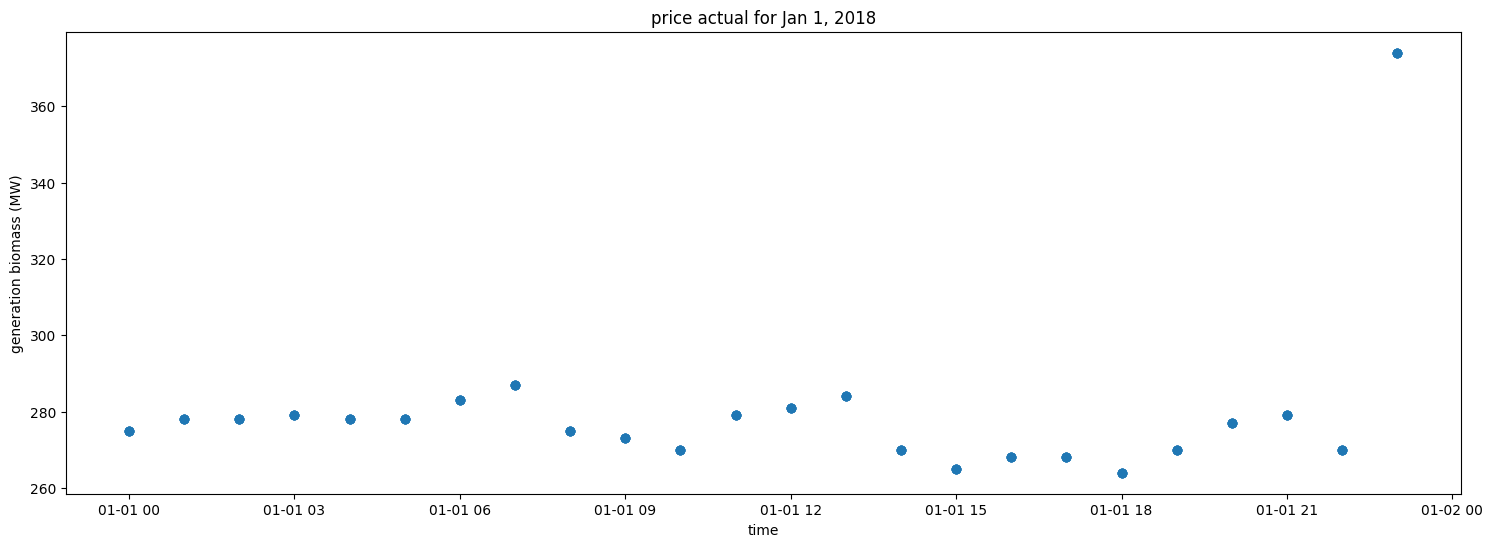

In [41]:
# scatter plot
# price actual for Jan 1, 2018

specific_date = pd.to_datetime('2018-01-01')
filtered_df = df[df['time'].dt.date == specific_date.date()]

plt.figure(figsize=(18,6))
plt.scatter(filtered_df['time'], filtered_df['generation biomass'])
plt.title('price actual for Jan 1, 2018')
plt.xlabel('time')
plt.ylabel('generation biomass (MW)')
plt.show()

- for this particular day, we can see that price actual is not same for each hour.

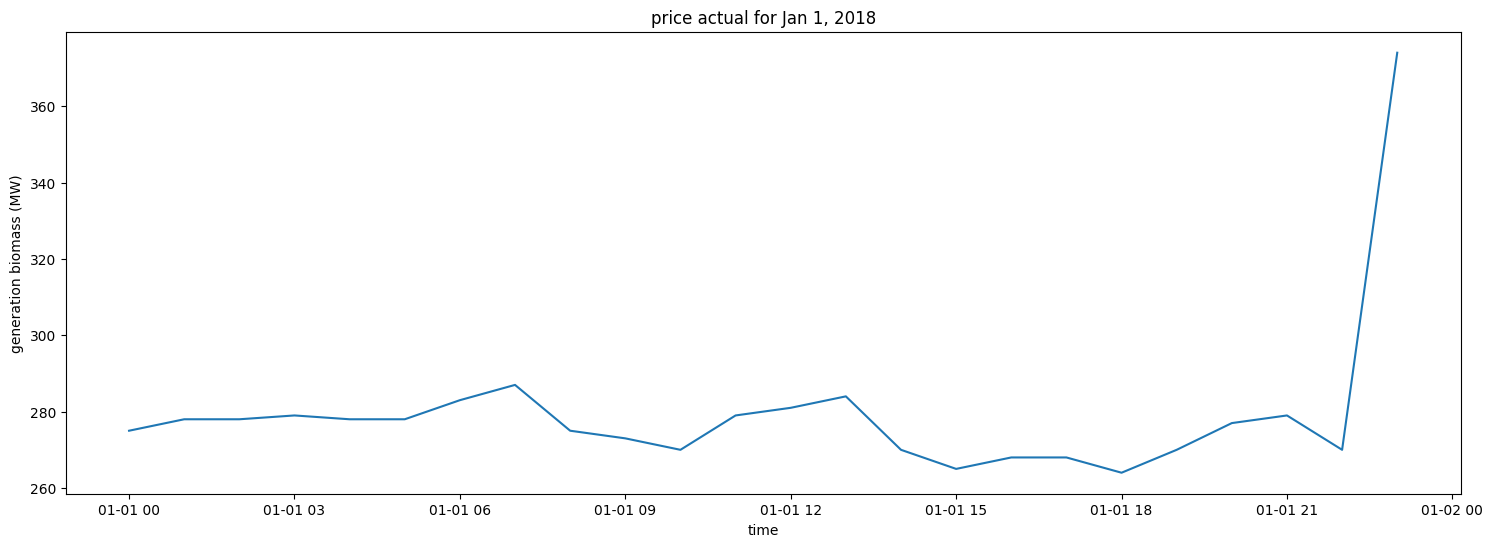

In [42]:
# line plot
# price actual for Jan 1, 2018

plt.figure(figsize=(18,6))
plt.plot(filtered_df['time'], filtered_df['generation biomass'])
plt.title('price actual for Jan 1, 2018')
plt.xlabel('time')
plt.ylabel('generation biomass (MW)')
plt.show()

## year on year

In [43]:
#Set timeframe data for easier accessing
df["year"]= df['time'].dt.year
df["month"]= df['time'].dt.month
df["date"] = df['time'].dt.day
df["day"] = df['time'].dt.day_name()

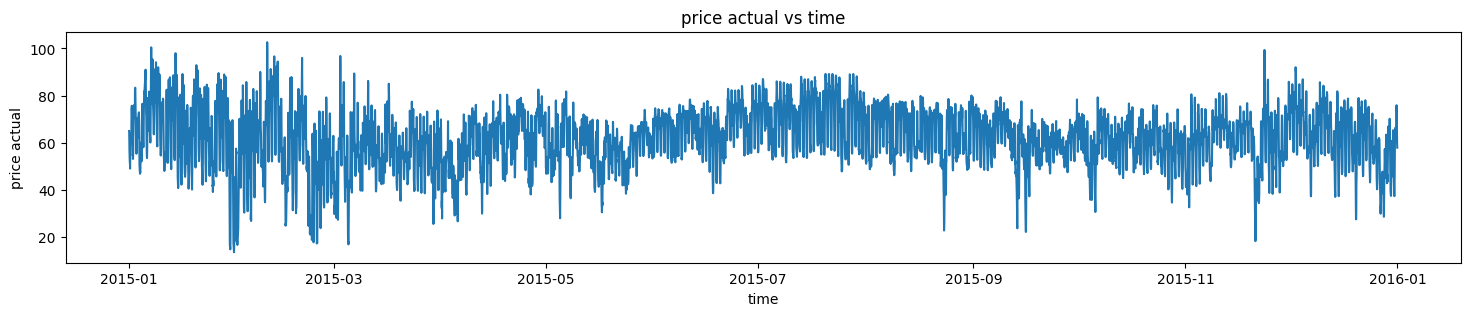

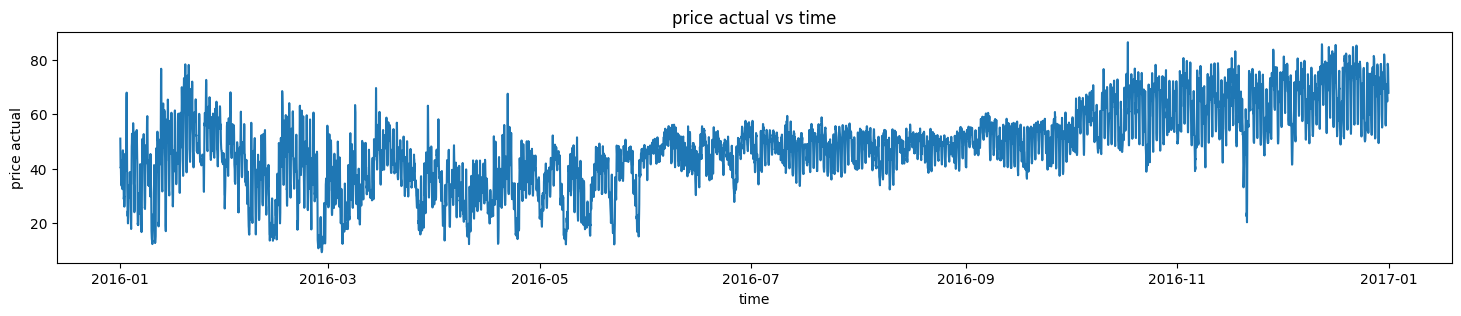

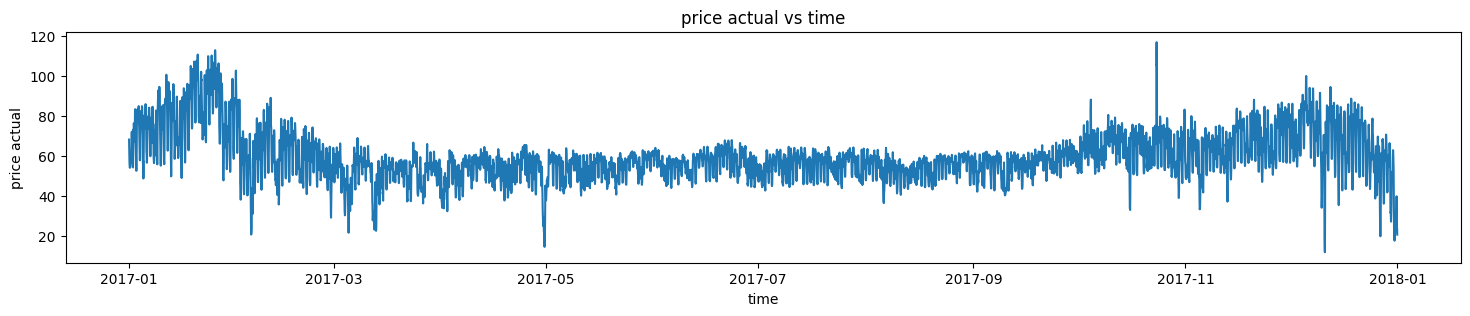

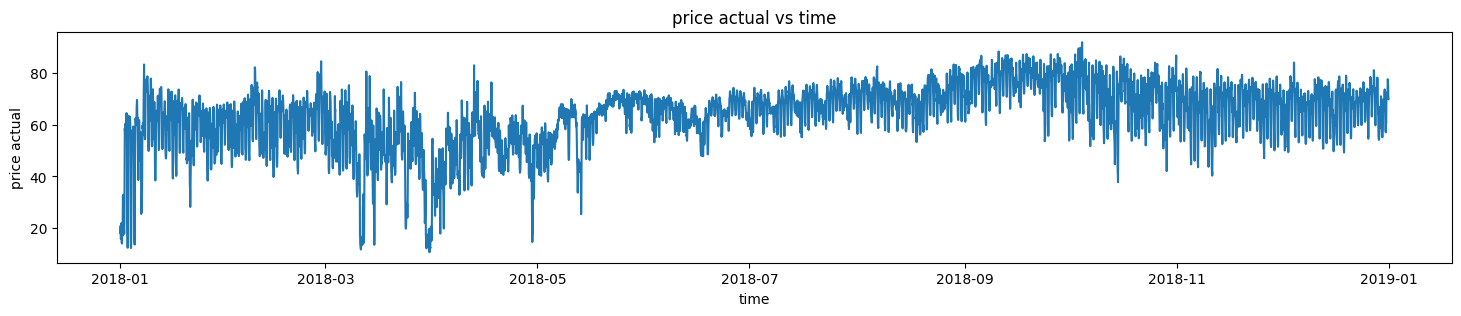

In [44]:
for y in range(2015, 2019):
    plt.figure(figsize=(18,3))
    df_current = df[df['time'].dt.year == y]
    plt.plot(df_current['time'], df_current['price actual'])
    plt.title('price actual vs time')
    plt.xlabel('time')
    plt.ylabel('price actual')
    plt.show()

- We can see somewhat of a pattern here. price increases for certain months.

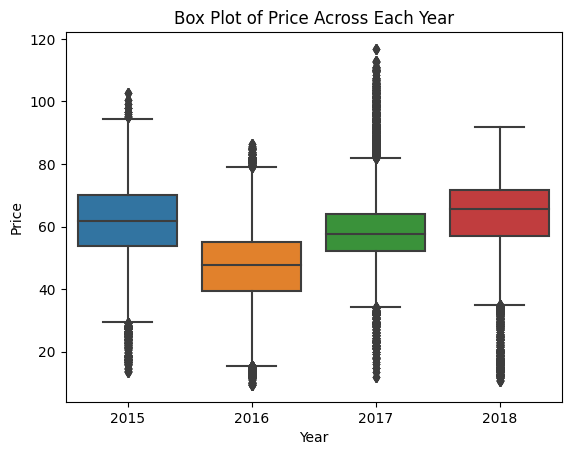

In [46]:
sns.boxplot(x='year', y='price actual', data=df)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Box Plot of Price Across Each Year')
plt.show()

- 2016 has lower price than other years.

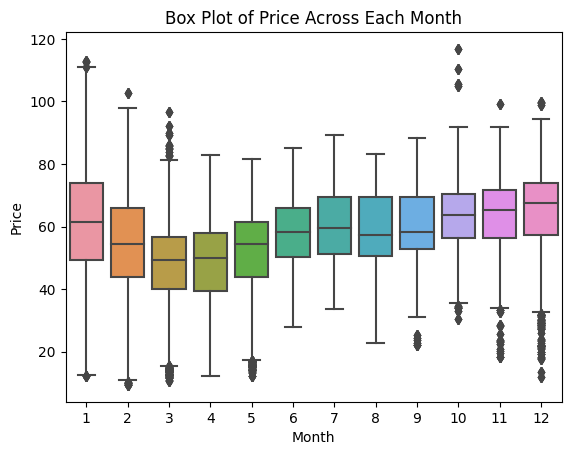

In [47]:
sns.boxplot(x='month', y='price actual', data=df)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Box Plot of Price Across Each Month')
plt.show()

- The months of 2 to 6 have lower values for price.

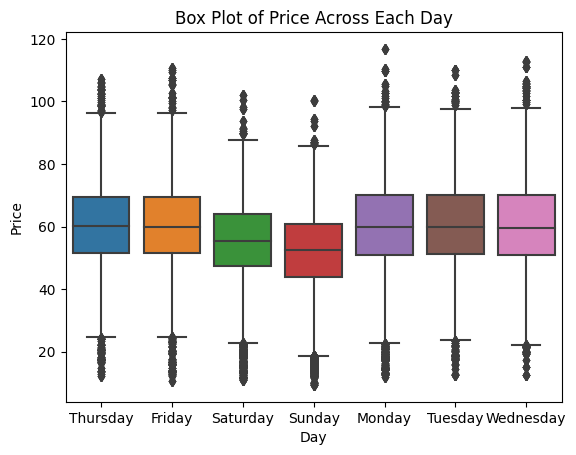

In [48]:
sns.boxplot(x='day', y='price actual', data=df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Box Plot of Price Across Each Day')
plt.show()

- Sunday has the lowest price values.

## total load actual

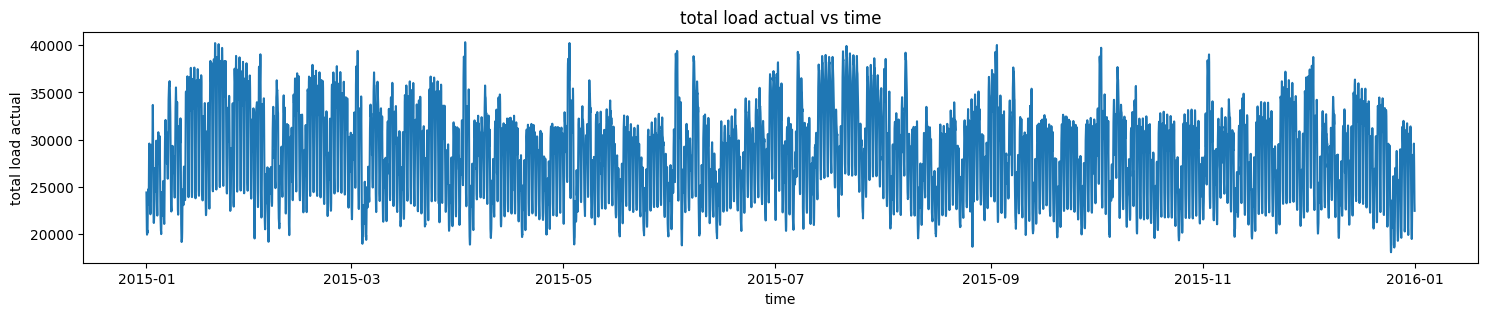

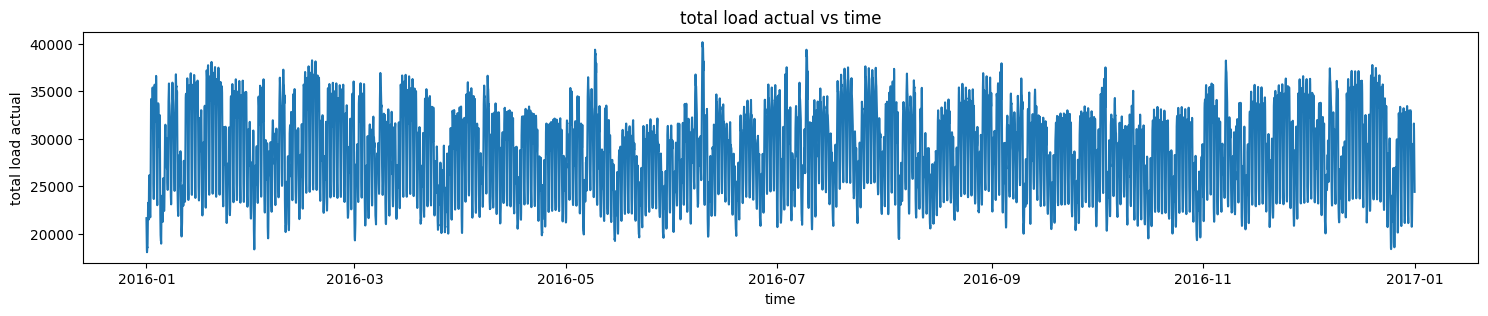

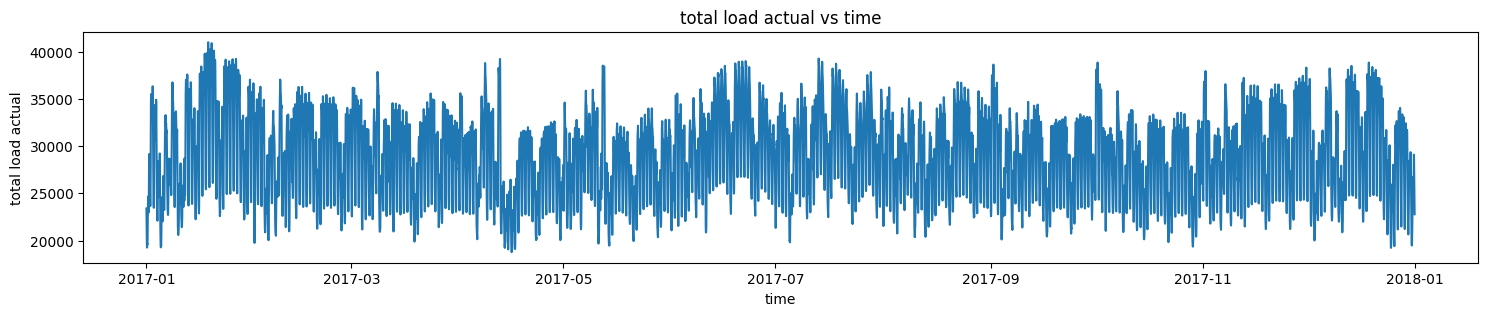

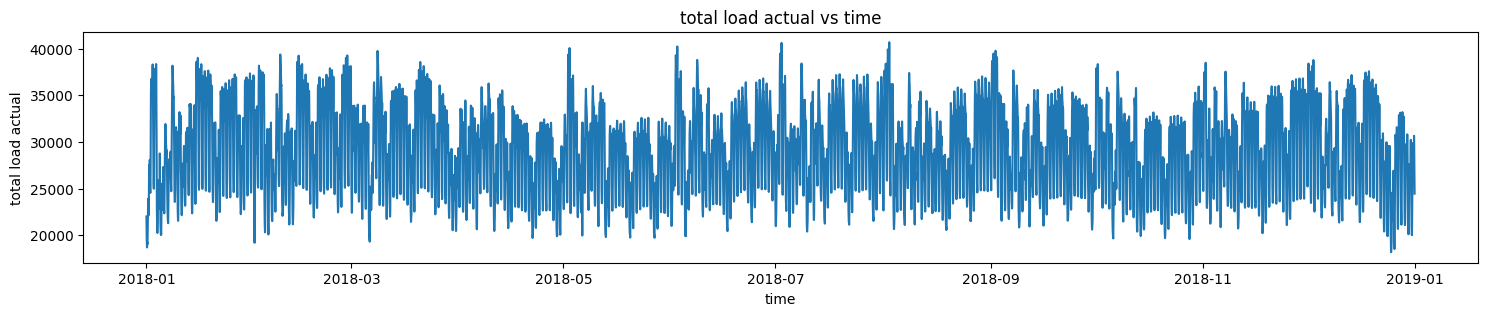

In [49]:
for y in range(2015, 2019):
    plt.figure(figsize=(18,3))
    df_current = df[df['time'].dt.year == y]
    plt.plot(df_current['time'], df_current['total load actual'])
    plt.title('total load actual vs time')
    plt.xlabel('time')
    plt.ylabel('total load actual')
    plt.show()

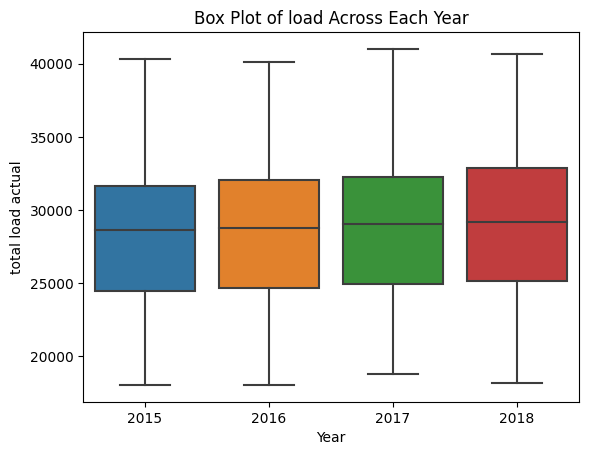

In [50]:
sns.boxplot(x='year', y='total load actual', data=df)
plt.xlabel('Year')
plt.ylabel('total load actual')
plt.title('Box Plot of load Across Each Year')
plt.show()

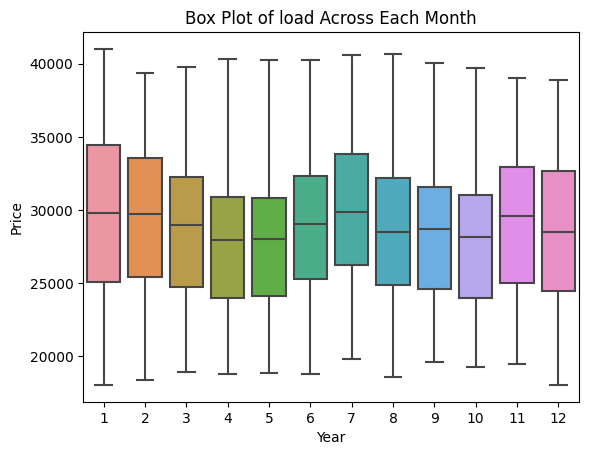

In [51]:
sns.boxplot(x='month', y='total load actual', data=df)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Box Plot of load Across Each Month')
plt.show()

- This plot relates to price over months, where load is lower for 2-6 months.

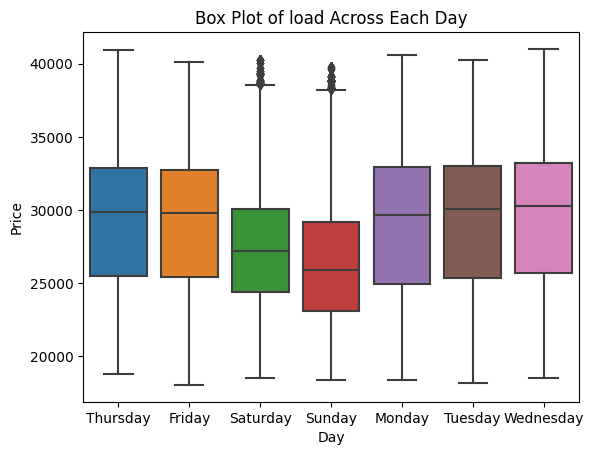

In [57]:
sns.boxplot(x='day', y='total load actual', data=df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Box Plot of load Across Each Day')
plt.show()

- Sunday has the lowest load value.

## temp

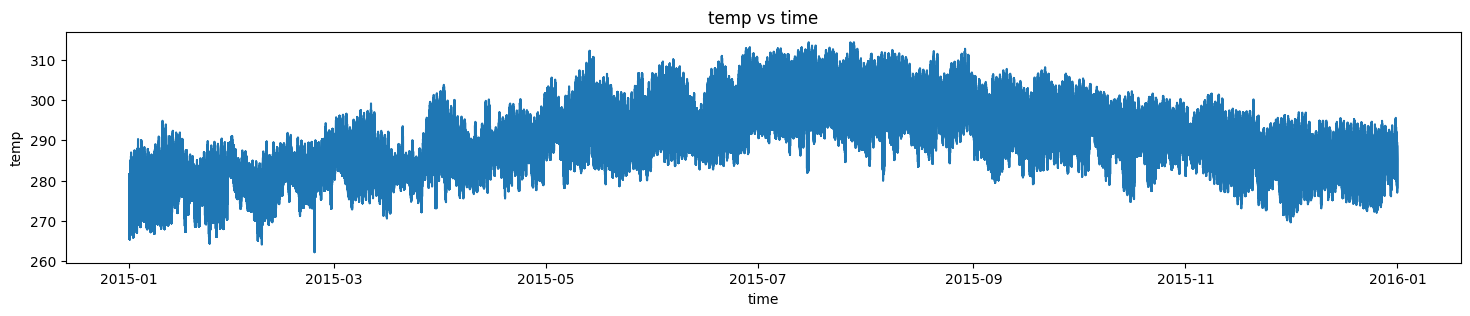

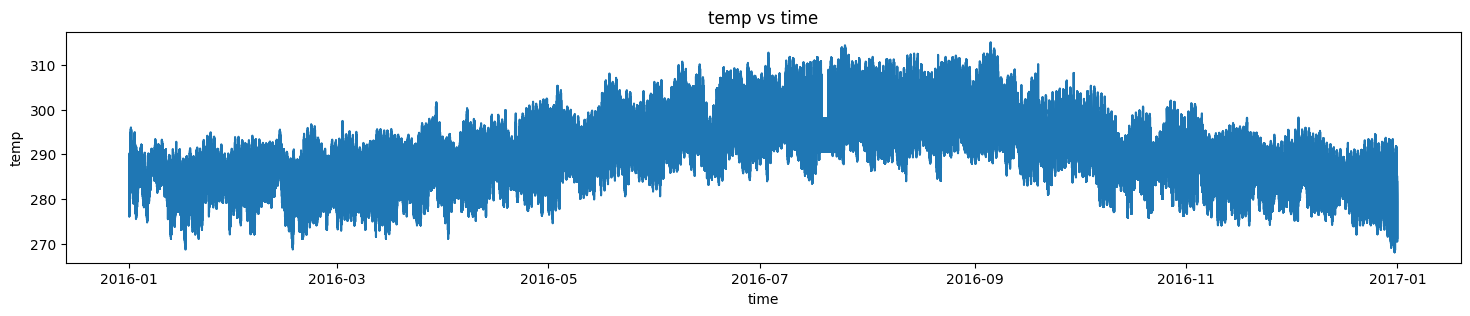

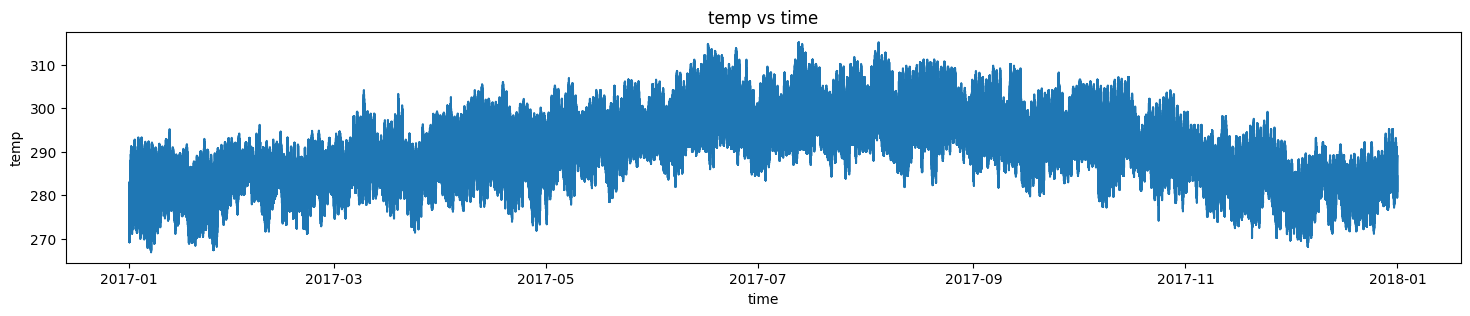

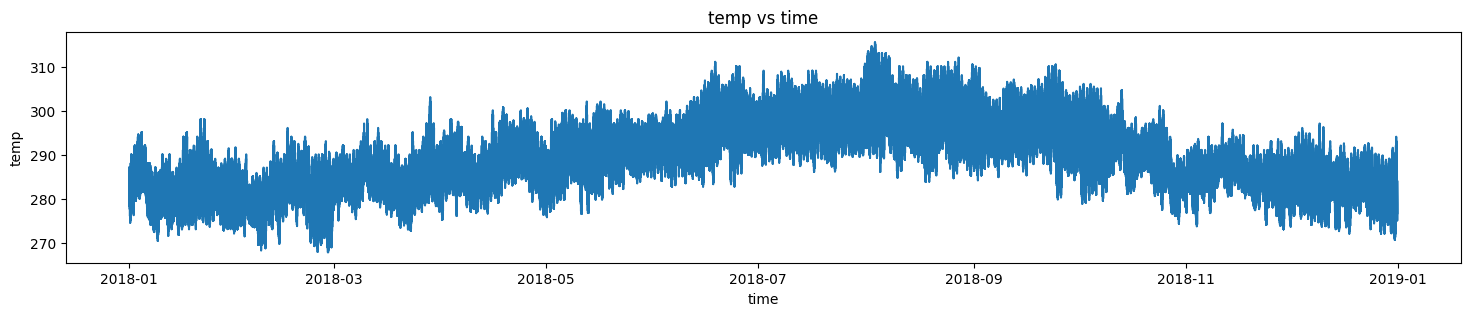

In [53]:
for y in range(2015, 2019):
    plt.figure(figsize=(18,3))
    df_current = df[df['time'].dt.year == y]
    plt.plot(df_current['time'], df_current['temp'])
    plt.title('temp vs time')
    plt.xlabel('time')
    plt.ylabel('temp')
    plt.show()

- temp generally increases for summer months.

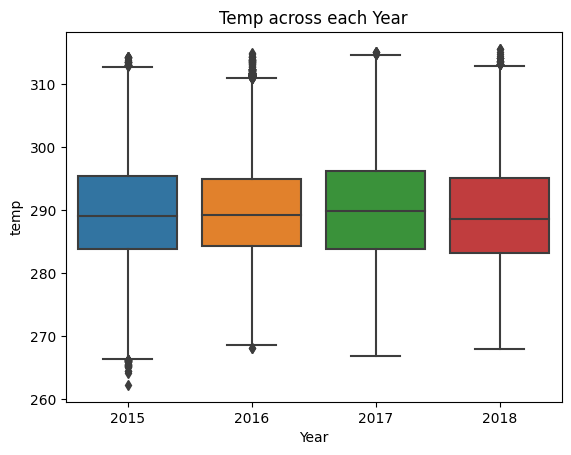

In [54]:
sns.boxplot(x='year', y='temp', data=df)
plt.xlabel('Year')
plt.ylabel('temp')
plt.title('Temp across each Year')
plt.show()

- temp values across years remains consistent.

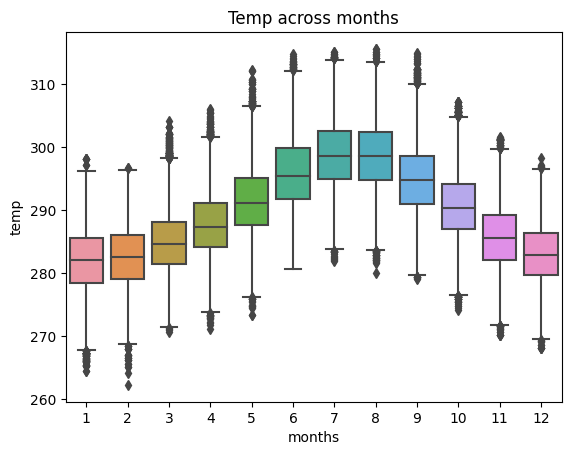

In [55]:
sns.boxplot(x='month', y='temp', data=df)
plt.xlabel('months')
plt.ylabel('temp')
plt.title('Temp across months')
plt.show()

- temp generally increases for summer months

## Correlation Plot

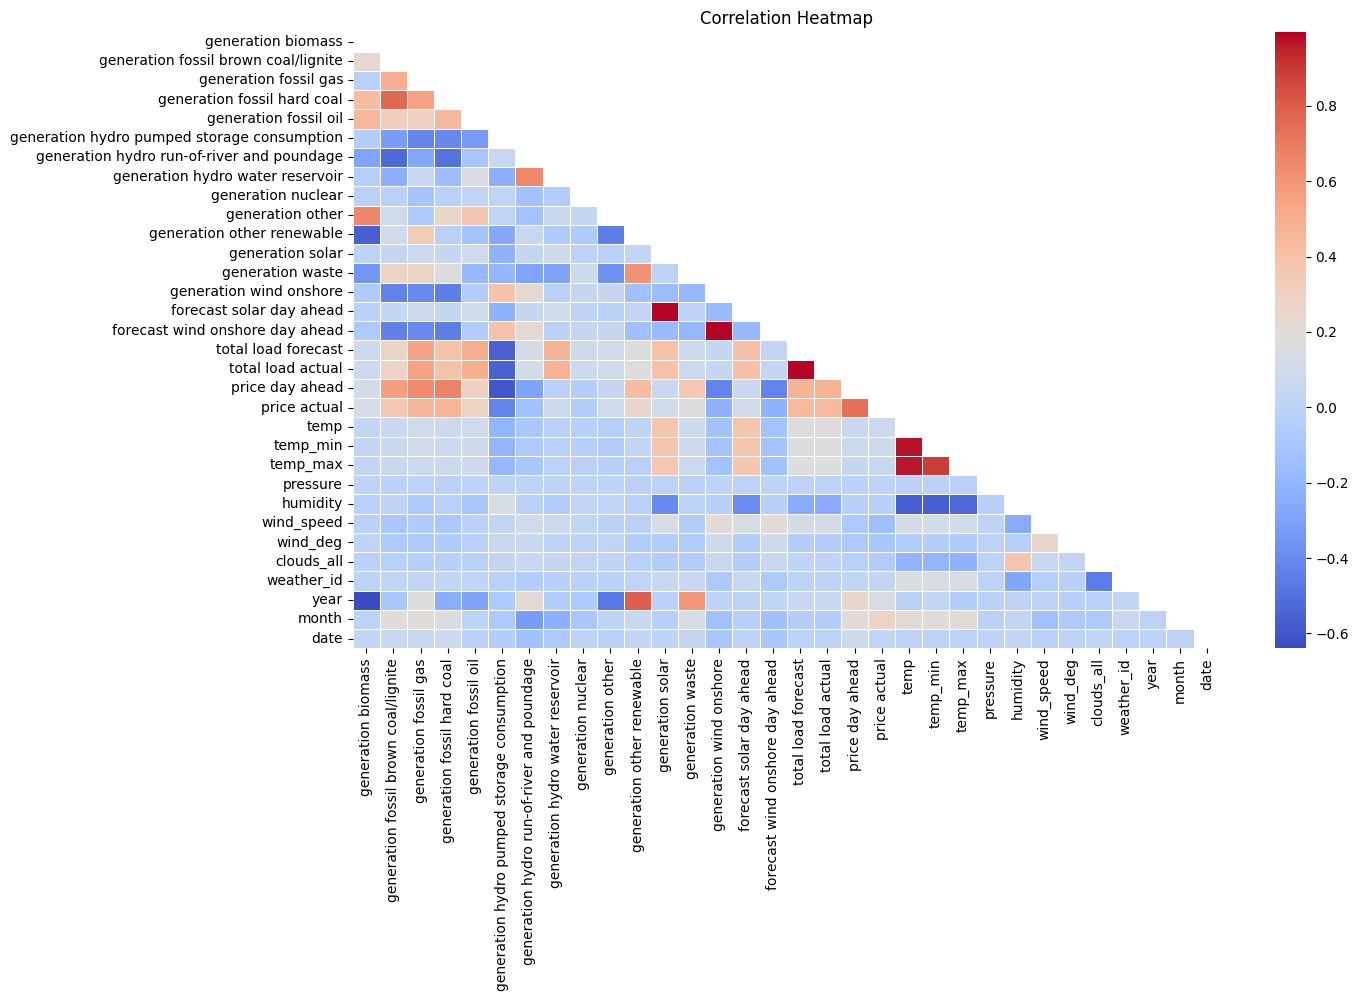

In [56]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(14, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

wrt price as target,
- strong +ve correlation for *price day ahead, total load actual, total load forecast, generation fossil gas, generation fossil hard coal.*
- strong -ve correlation for *generation hydro pumped storage consumption, generation wind offshore, forecast wind offshore day ahaead.*